# scRNAseq_keloid_integrate_KF1_KF2_KF3_NF1_NF2

In [1]:
rm(list=ls())
gc()
library(Seurat)

used   (Mb) gc trigger (Mb) max used (Mb)
Ncells 532330 28.5 1200052    64.1  641780  34.3
Vcells 991474  7.6 8388608    64.0 1754429  13.4

In [2]:
setwd("/Project_directry/allSample/integrate.KF1.KF2.KF3.NF1.NF2.NF3.dataset")

In [3]:
load("../NF1/NF1.seurat.object.Rdata")

In [4]:
load("../NF2/NF2.seurat.object.Rdata")

In [5]:
load("../NF3/NF3.seurat.object.Rdata")

In [6]:
load("../KF1/KF1.seurat.object.Rdata")

In [7]:
load("../KF2/KF2.seurat.object.Rdata")

In [8]:
load("../KF3/KF3.seurat.object.Rdata")

In [9]:
table(NF1$dataset)
table(NF2$dataset)
table(NF3$dataset)
table(KF1$dataset)
table(KF2$dataset)
table(KF3$dataset)



 NF1 
6541 


 NF2 
7523 


 NF3 
5103 


 KF1 
7612 


 KF2 
7159 


 KF3 
6717 

In [10]:
integrate.all.NF.all.KF.list=list(NF1,NF2,NF3,KF1,KF2,KF3)
integrate.all.NF.all.KF.anchors <- FindIntegrationAnchors(object.list = integrate.all.NF.all.KF.list, dims = 1:30)

Warning message in CheckDuplicateCellNames(object.list = object.list):
“Some cell names are duplicated across objects provided. Renaming to enforce unique cell names.”Computing 2000 integration features
Scaling features for provided objects
Finding all pairwise anchors
Running CCA
Merging objects
Finding neighborhoods
Finding anchors
	Found 13219 anchors
Filtering anchors
	Retained 8009 anchors
Extracting within-dataset neighbors
Running CCA
Merging objects
Finding neighborhoods
Finding anchors
	Found 8228 anchors
Filtering anchors
	Retained 5666 anchors
Extracting within-dataset neighbors
Running CCA
Merging objects
Finding neighborhoods
Finding anchors
	Found 11882 anchors
Filtering anchors
	Retained 9715 anchors
Extracting within-dataset neighbors
Running CCA
Merging objects
Finding neighborhoods
Finding anchors
	Found 13086 anchors
Filtering anchors
	Retained 7603 anchors
Extracting within-dataset neighbors
Running CCA
Merging objects
Finding neighborhoods
Finding anchors
	Found 12

In [11]:
integrate.all.NF.all.KF <- IntegrateData(anchorset = integrate.all.NF.all.KF.anchors, dims = 1:30)

Merging dataset 3 into 2
Extracting anchors for merged samples
Finding integration vectors
Finding integration vector weights
Integrating data
Merging dataset 5 into 4
Extracting anchors for merged samples
Finding integration vectors
Finding integration vector weights
Integrating data
Merging dataset 6 into 4 5
Extracting anchors for merged samples
Finding integration vectors
Finding integration vector weights
Integrating data
Merging dataset 1 into 2 3
Extracting anchors for merged samples
Finding integration vectors
Finding integration vector weights
Integrating data
Merging dataset 2 3 1 into 4 5 6
Extracting anchors for merged samples
Finding integration vectors
Finding integration vector weights
Integrating data


In [12]:
save(integrate.all.NF.all.KF,file="tmp.Rdata")

In [13]:
DefaultAssay(integrate.all.NF.all.KF) <- "integrated"
integrate.all.NF.all.KF <- ScaleData(integrate.all.NF.all.KF, verbose = FALSE)
integrate.all.NF.all.KF <- RunPCA(integrate.all.NF.all.KF, npcs = 30, verbose = FALSE)
integrate.all.NF.all.KF <- RunUMAP(integrate.all.NF.all.KF, reduction = "pca", dims = 1:30)
integrate.all.NF.all.KF <- FindNeighbors(integrate.all.NF.all.KF, dims = 1:30)
integrate.all.NF.all.KF <- FindClusters(integrate.all.NF.all.KF, resolution = 0.5)
integrate.all.NF.all.KF <- RunTSNE(object = integrate.all.NF.all.KF, dims.use = 1:30, do.fast = TRUE)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”09:01:01 UMAP embedding parameters a = 0.9922 b = 1.112
09:01:02 Read 40655 rows and found 30 numeric columns
09:01:02 Using Annoy for neighbor search, n_neighbors = 30
09:01:02 Building Annoy index with metric = cosine, n_trees = 50
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
09:01:09 Writing NN index file to temp file /tmp/RtmpdGpRY1/file20c02587aa756
09:01:10 Searching Annoy index using 1 thread, search_k = 3000
09:01:27 Annoy recall = 100%
09:01:27 Commencing smooth kNN distance calibration using 1 thread
09:01:29 Initializing from normalized Laplacian + noise
09:01:39 Commencing optimizat

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 40655
Number of edges: 1701322

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9362
Number of communities: 24
Elapsed time: 12 seconds


Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”

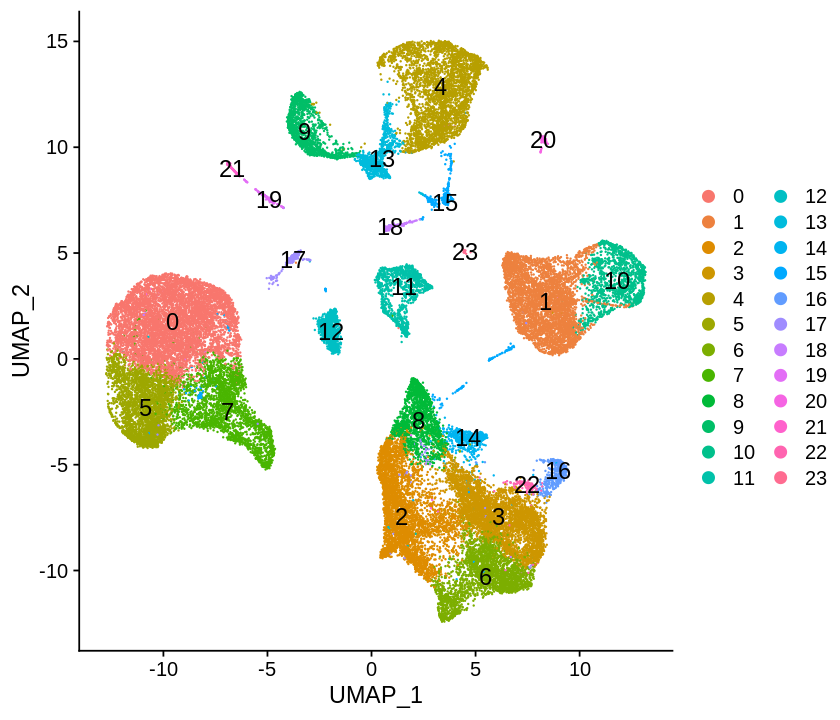

In [14]:
options(repr.plot.width=7,repr.plot.height=6)
DimPlot(integrate.all.NF.all.KF, reduction = "umap", label=T,label.size = 5)

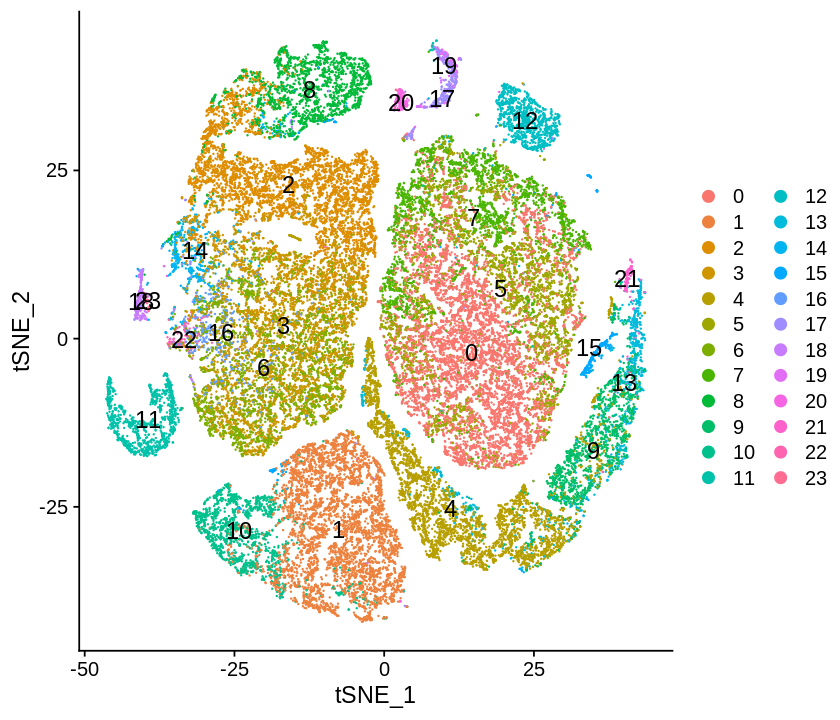

In [15]:
options(repr.plot.width=7,repr.plot.height=6)
DimPlot(integrate.all.NF.all.KF, reduction = "tsne", label=T,label.size = 5)

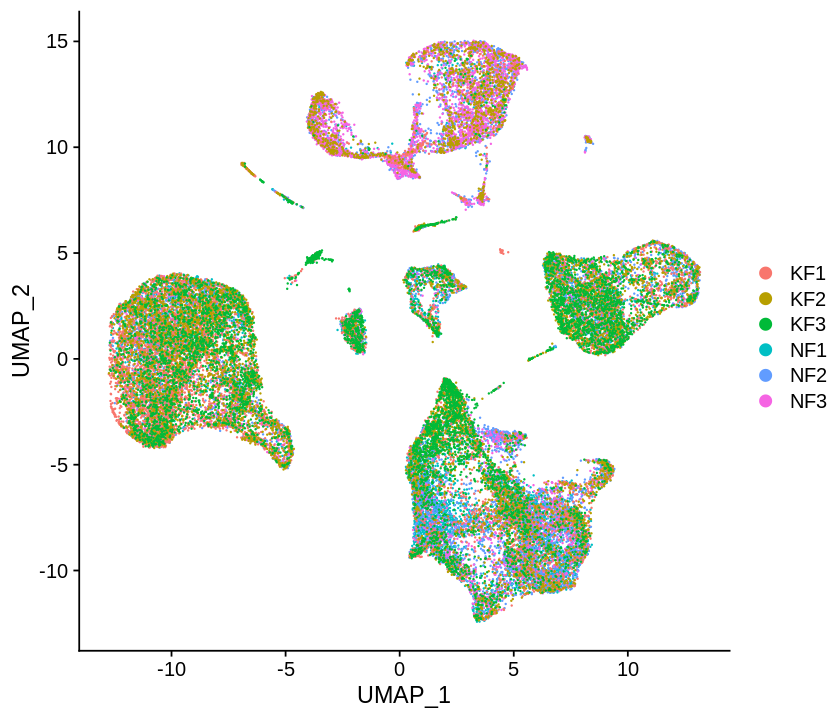

In [16]:
options(repr.plot.width=7,repr.plot.height=6)
DimPlot(integrate.all.NF.all.KF, reduction = "umap", label=F,label.size = 5,group.by = "dataset")

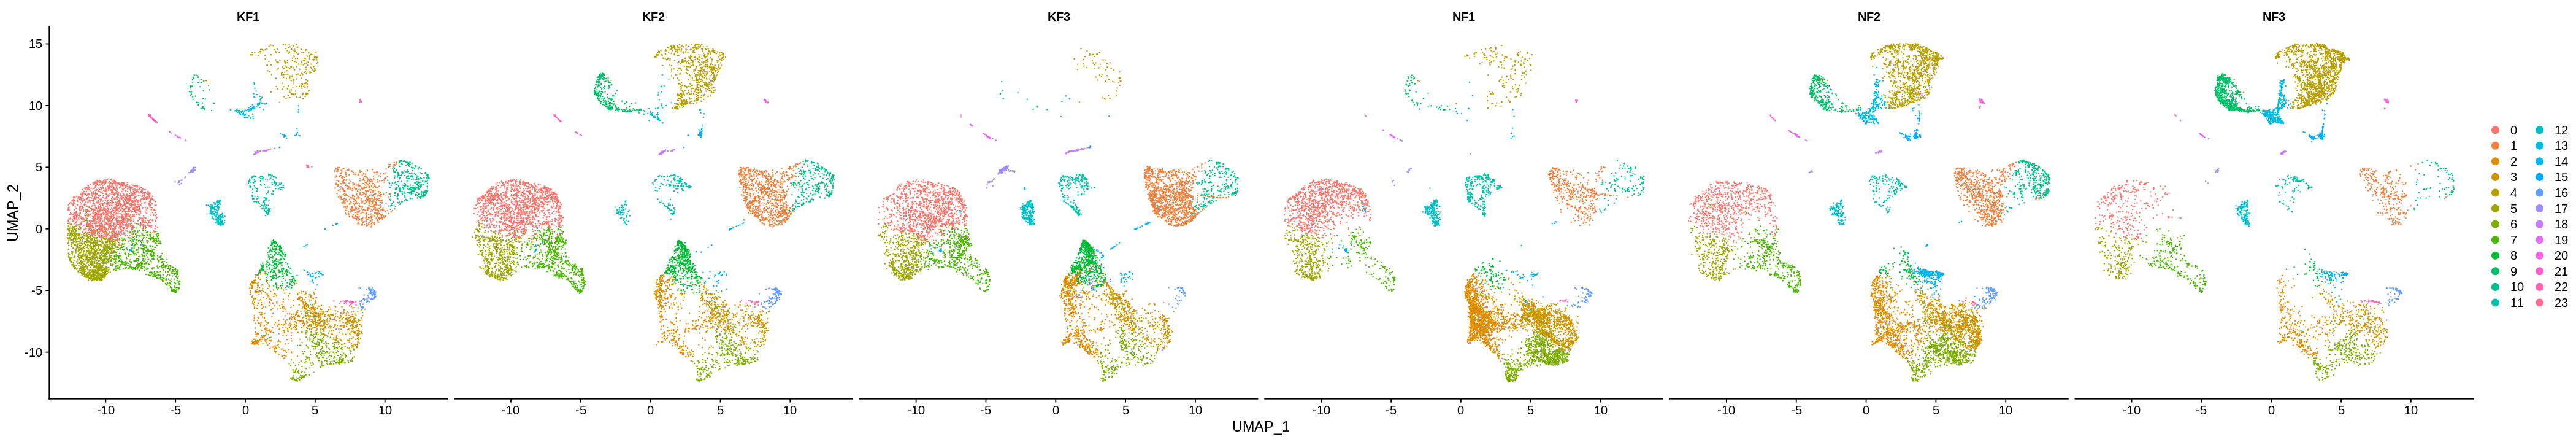

In [18]:
options(repr.plot.width=35,repr.plot.height=6)
DimPlot(integrate.all.NF.all.KF, reduction = "umap", label=F,label.size = 5,split.by = "dataset")

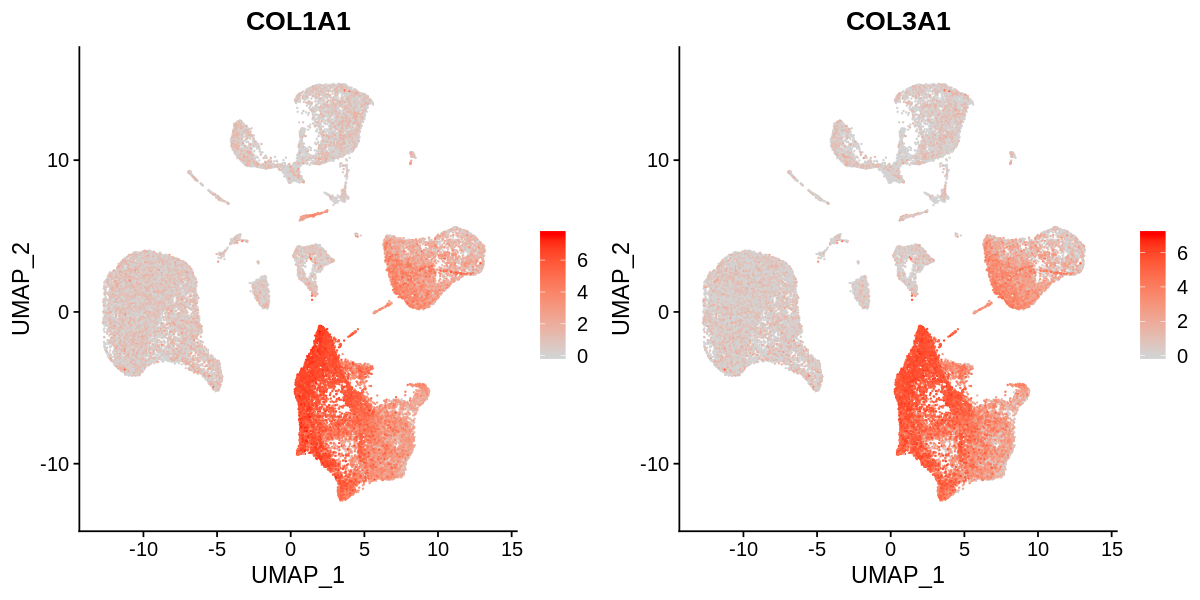

In [19]:
#fibroblast
DefaultAssay(integrate.all.NF.all.KF)="RNA"
options(repr.plot.width=10,repr.plot.height=5)
FeaturePlot(integrate.all.NF.all.KF, features = c("COL1A1","COL3A1"),nc=2,cols=c("lightgrey", "red"))

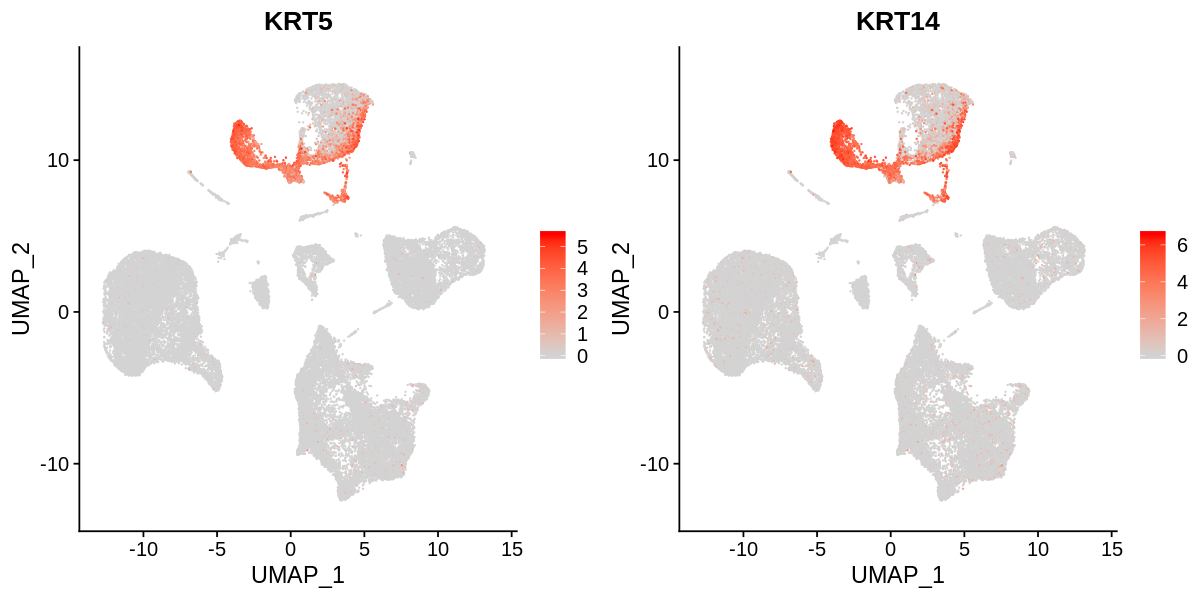

In [20]:
#basal cell (keratinocytes)
options(repr.plot.width=10,repr.plot.height=5)
FeaturePlot(integrate.all.NF.all.KF, features = c("KRT5", "KRT14"),cols=c("lightgrey", "red"))

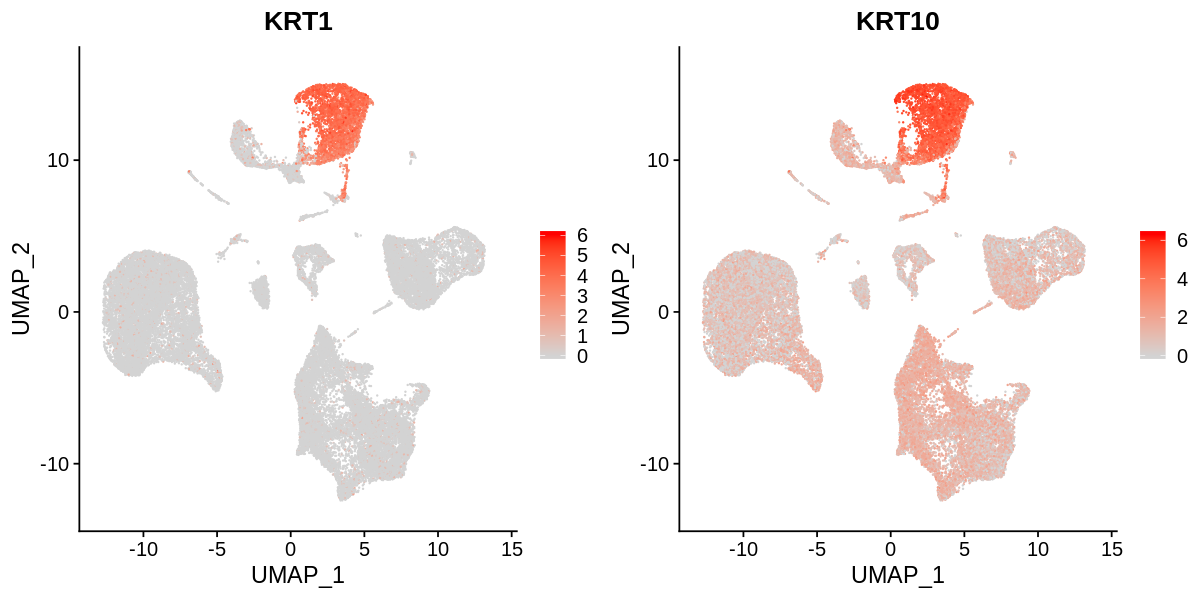

In [21]:
#keratinocytes spinous_cell
options(repr.plot.width=10,repr.plot.height=5)
FeaturePlot(integrate.all.NF.all.KF, features = c("KRT1", "KRT10"),cols=c("lightgrey", "red"))

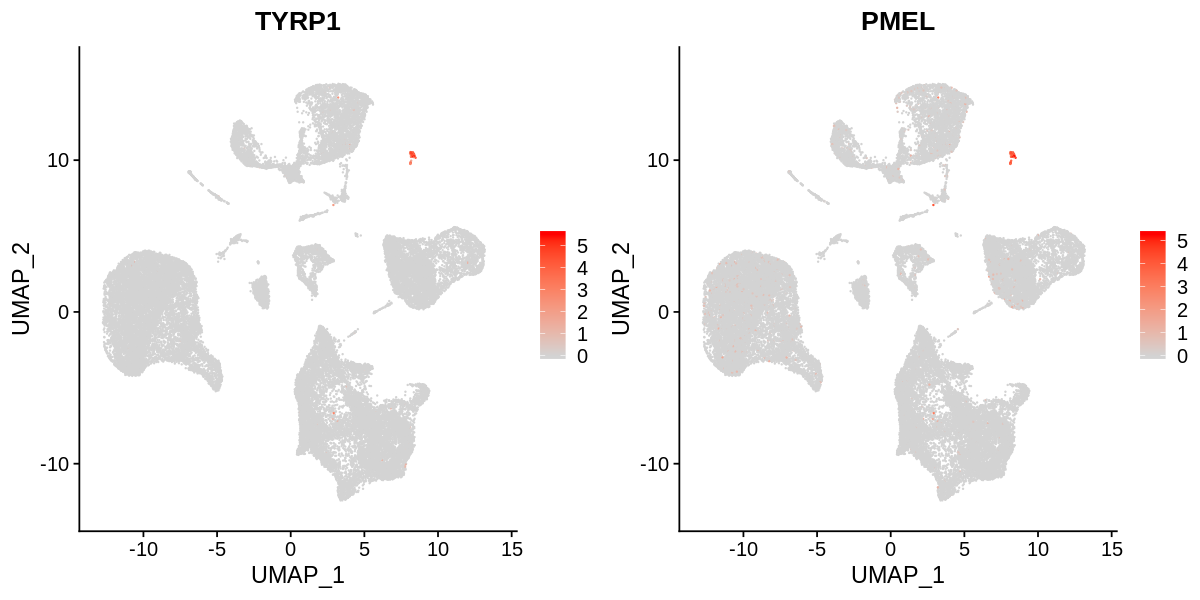

In [22]:
#Melanocytes
options(repr.plot.width=10,repr.plot.height=5)
FeaturePlot(integrate.all.NF.all.KF, features = c("TYRP1", "PMEL"),cols=c("lightgrey", "red"))

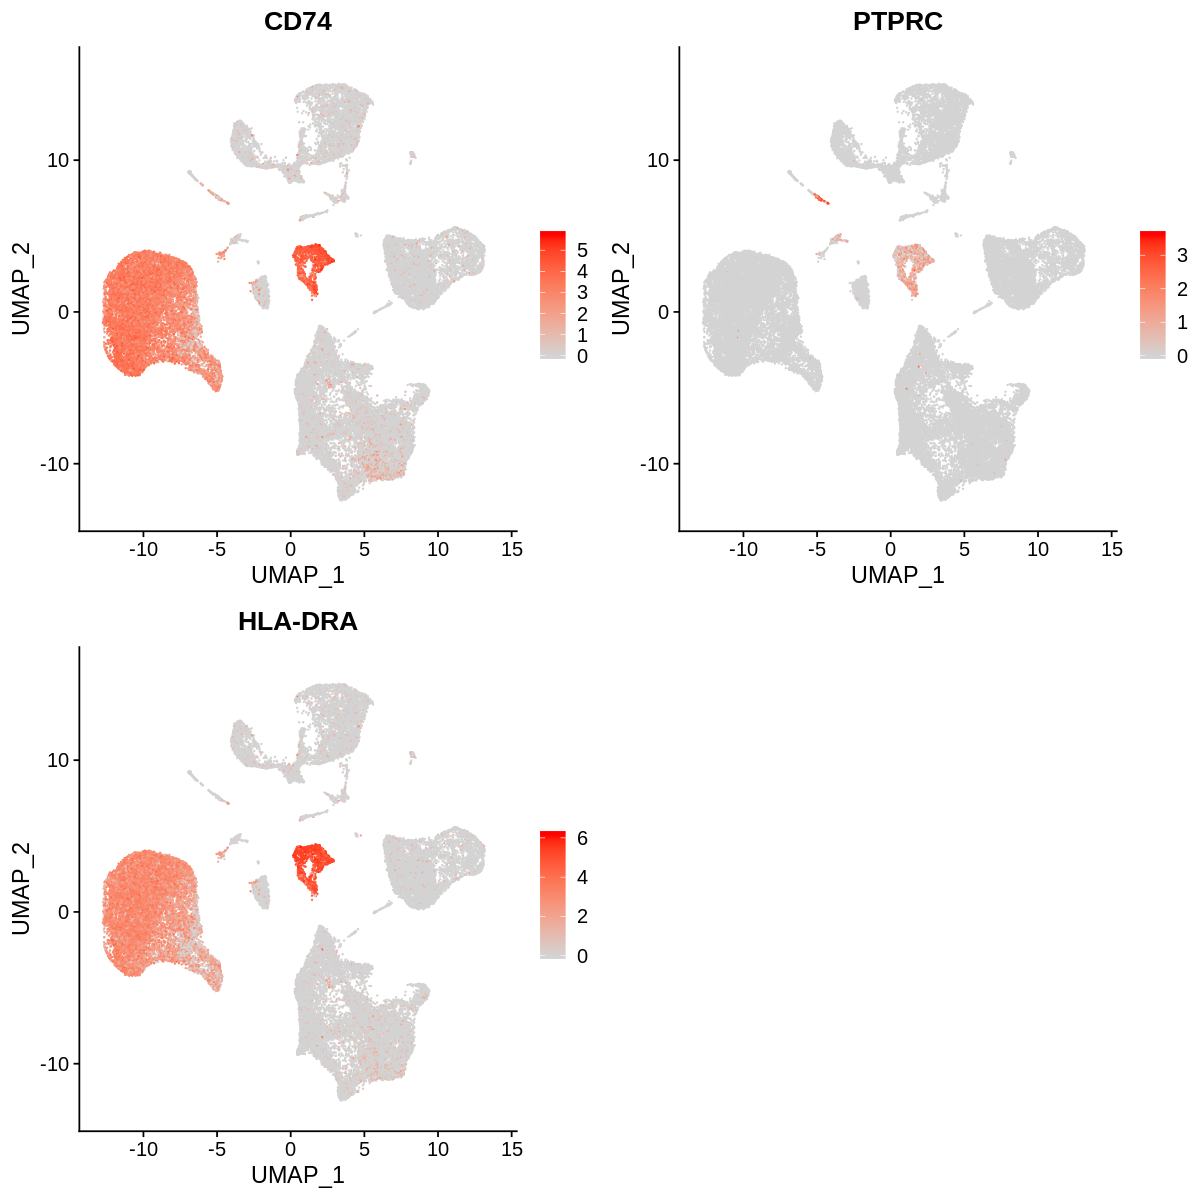

In [23]:
#immune
options(repr.plot.width=10,repr.plot.height=10)
FeaturePlot(integrate.all.NF.all.KF, features = c("CD74", "PTPRC","HLA-DRA"),cols=c("lightgrey", "red"))

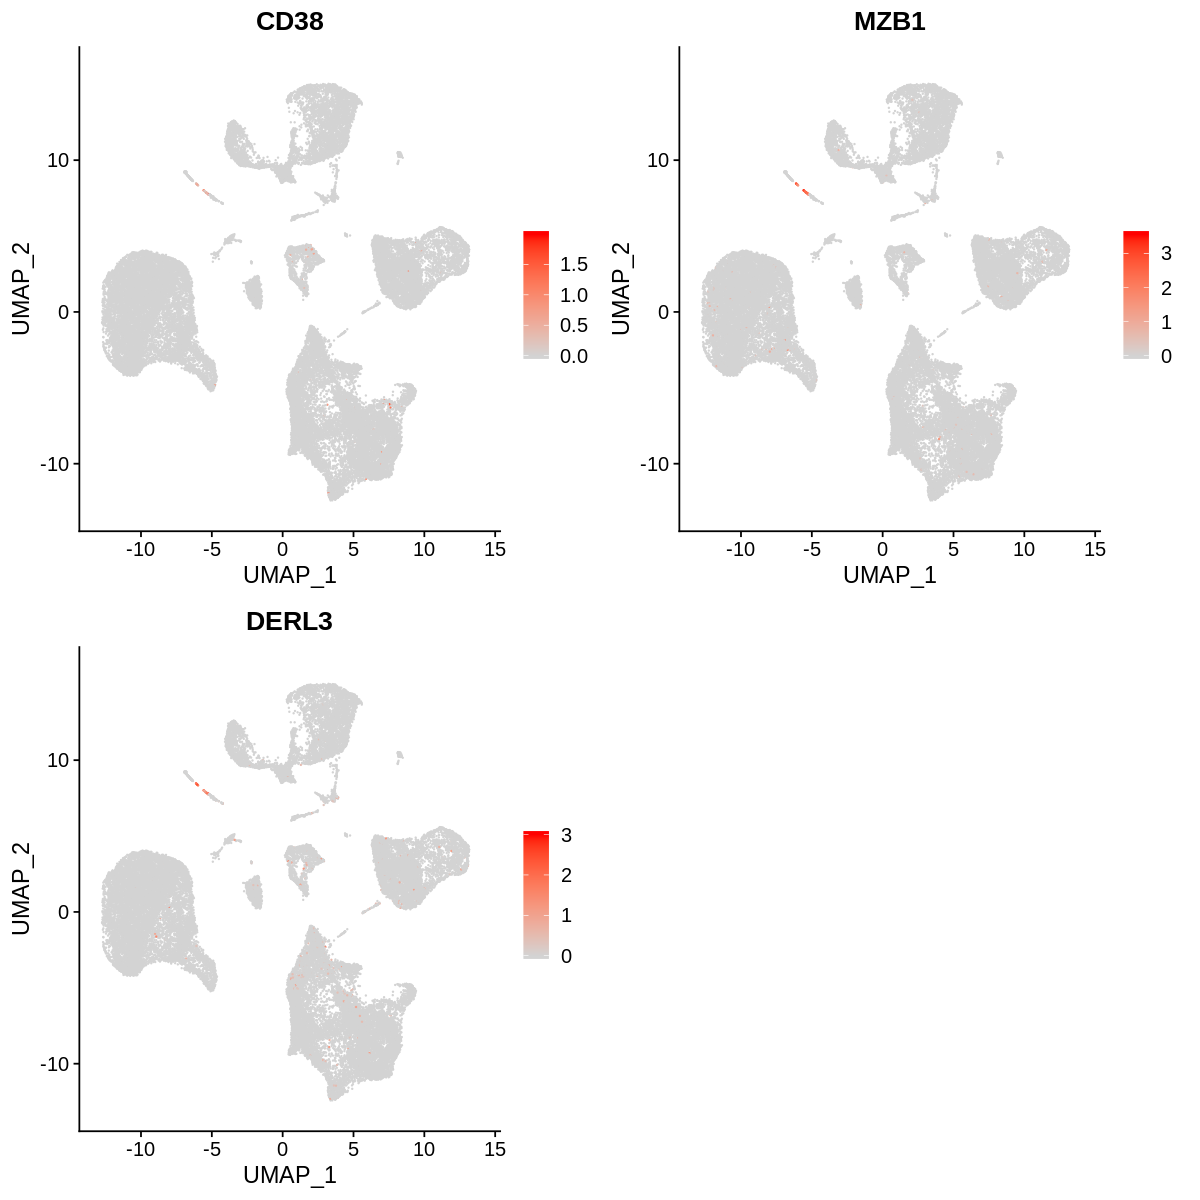

In [24]:
#immune B
options(repr.plot.width=10,repr.plot.height=10)
FeaturePlot(integrate.all.NF.all.KF, features = c("CD38","MZB1","DERL3"),cols=c("lightgrey", "red"))

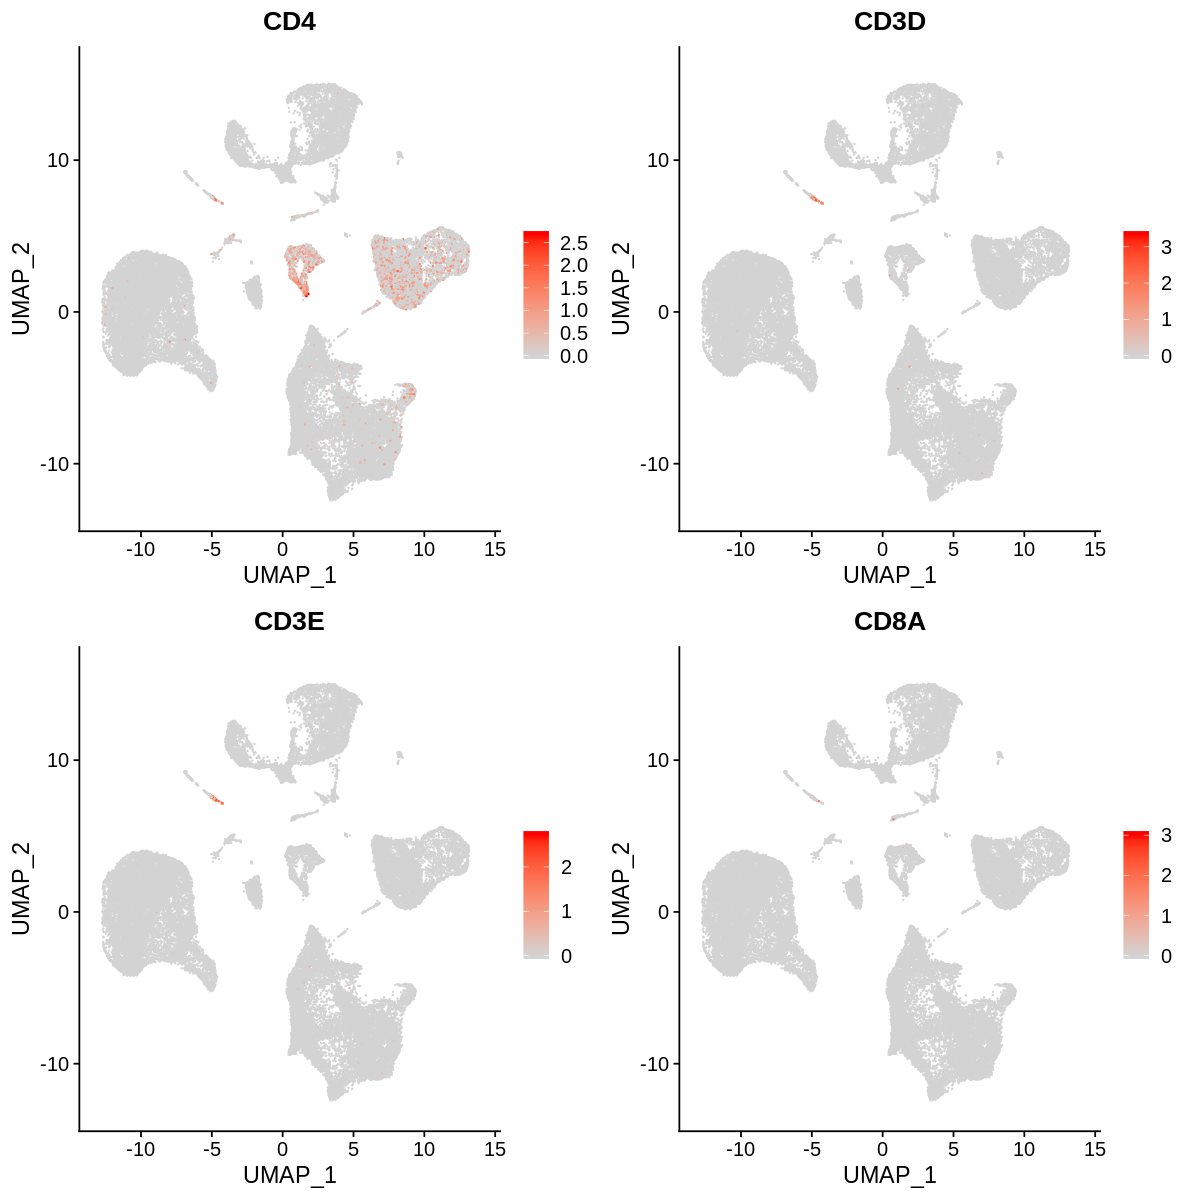

In [25]:
#immune T
options(repr.plot.width=10,repr.plot.height=10)
FeaturePlot(integrate.all.NF.all.KF, features = c("CD4","CD3D","CD3E","CD8A"),cols=c("lightgrey", "red"))

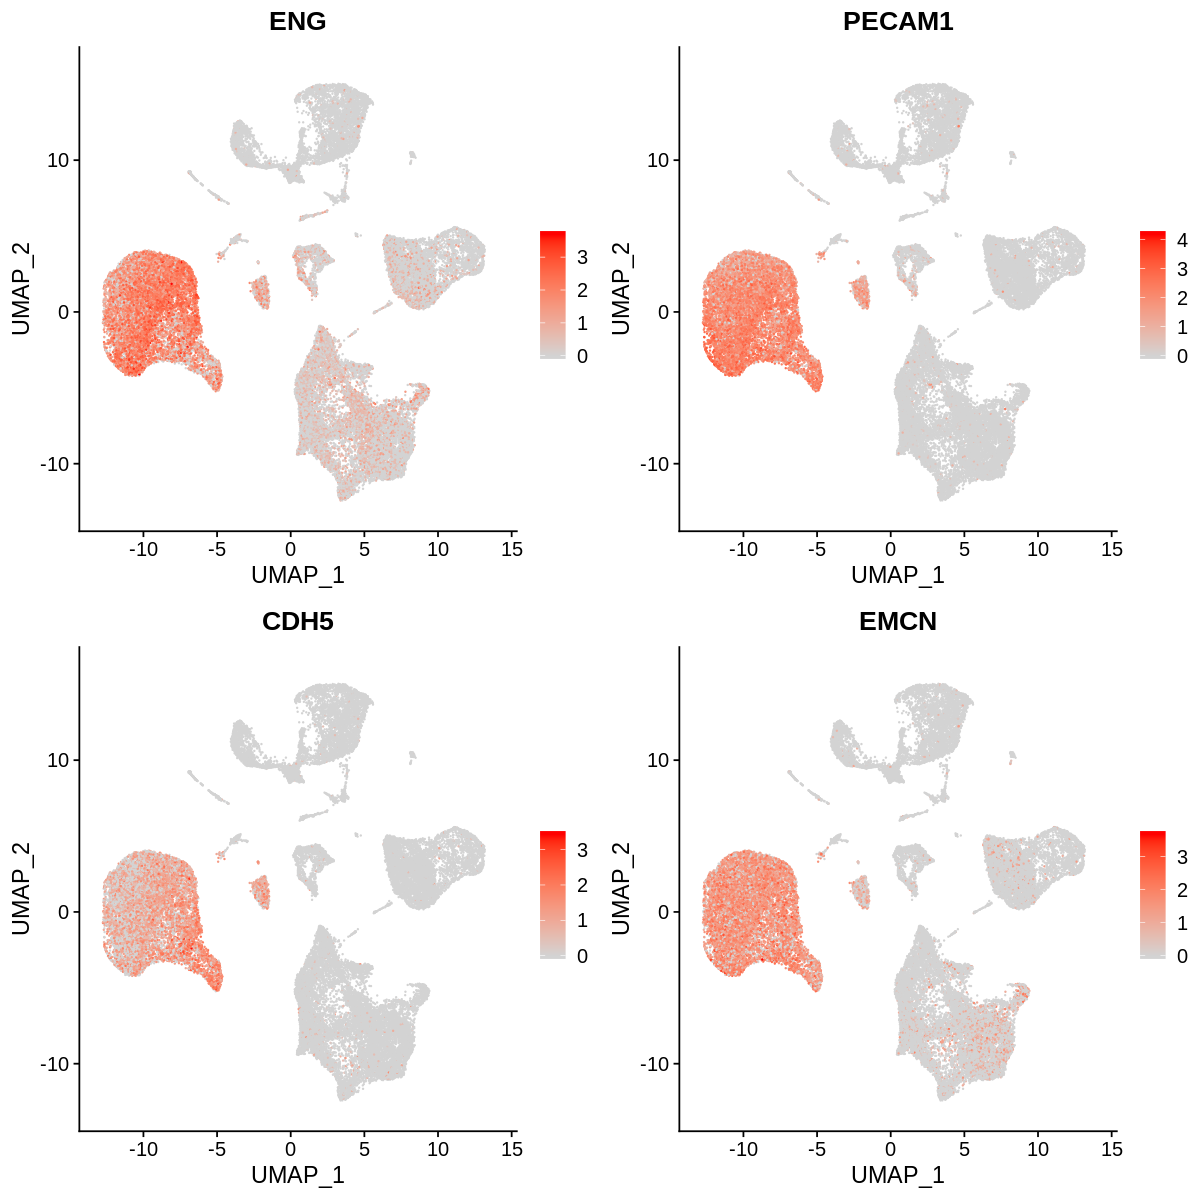

In [26]:
#endothelial cells
options(repr.plot.width=10,repr.plot.height=10)
FeaturePlot(integrate.all.NF.all.KF, features = c("ENG","PECAM1","CDH5","EMCN"),cols=c("lightgrey", "red"))

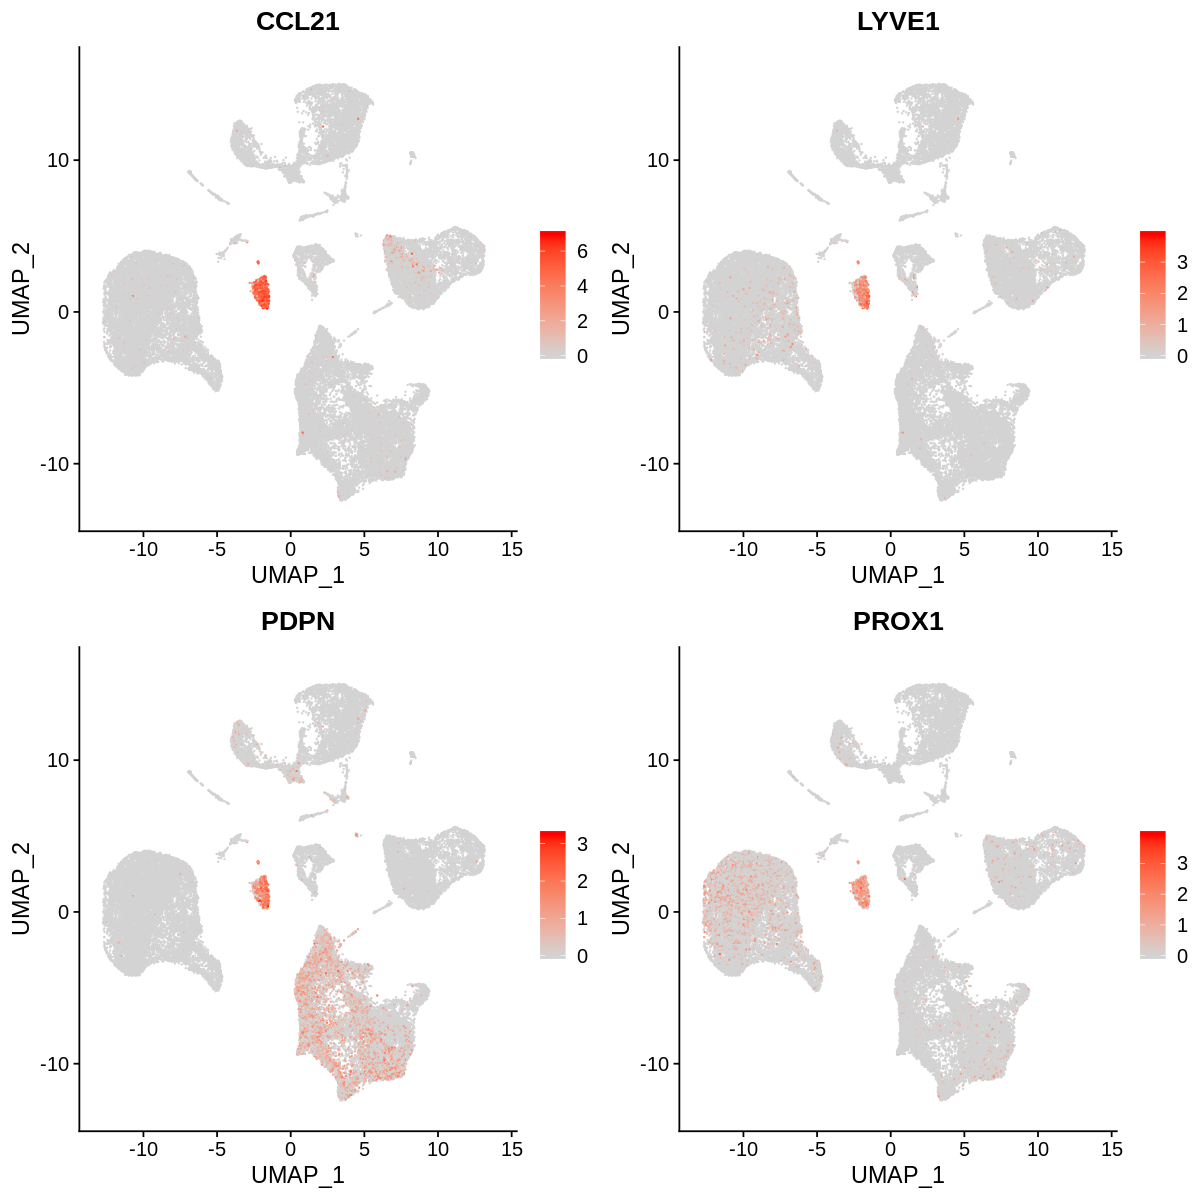

In [27]:
#lymphatic endothelial marker
options(repr.plot.width=10,repr.plot.height=10)
FeaturePlot(integrate.all.NF.all.KF, features = c("CCL21","LYVE1","PDPN","PROX1"),cols=c("lightgrey", "red"))

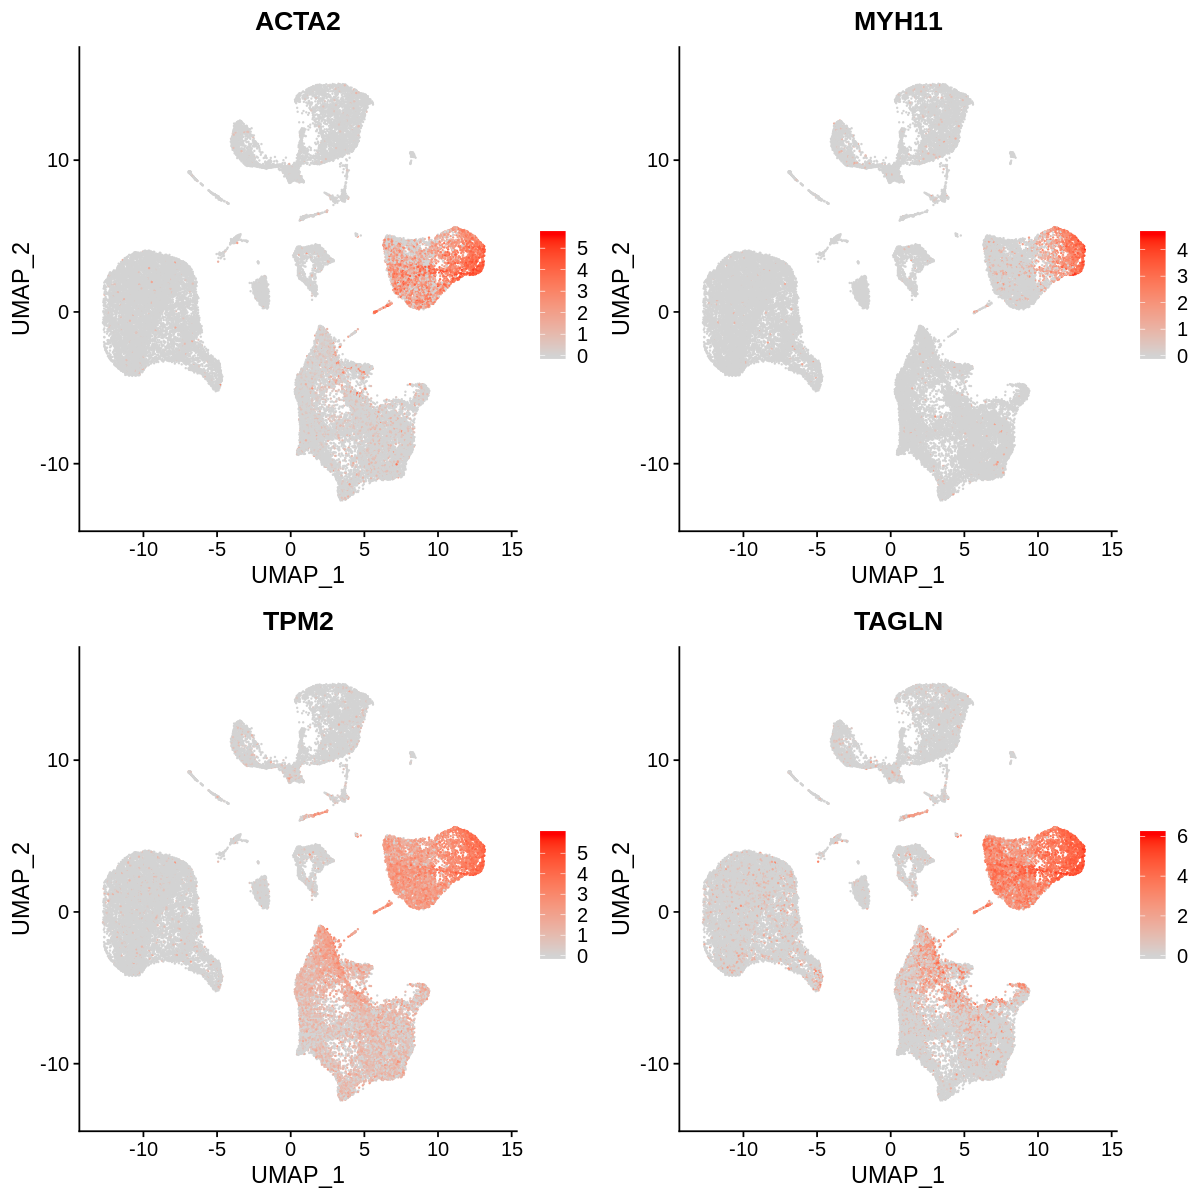

In [28]:
#muscle fiber marker
options(repr.plot.width=10,repr.plot.height=10)
FeaturePlot(integrate.all.NF.all.KF, features = c("ACTA2","MYH11","TPM2","TAGLN"),cols=c("lightgrey", "red"))

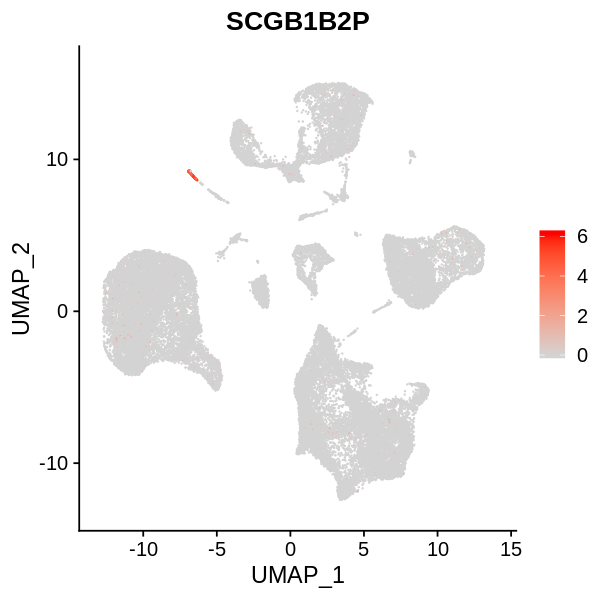

In [29]:
#secretory (glandular) cells
options(repr.plot.width=5,repr.plot.height=5)
FeaturePlot(integrate.all.NF.all.KF, features = c("SCGB1B2P"),cols=c("lightgrey", "red"))

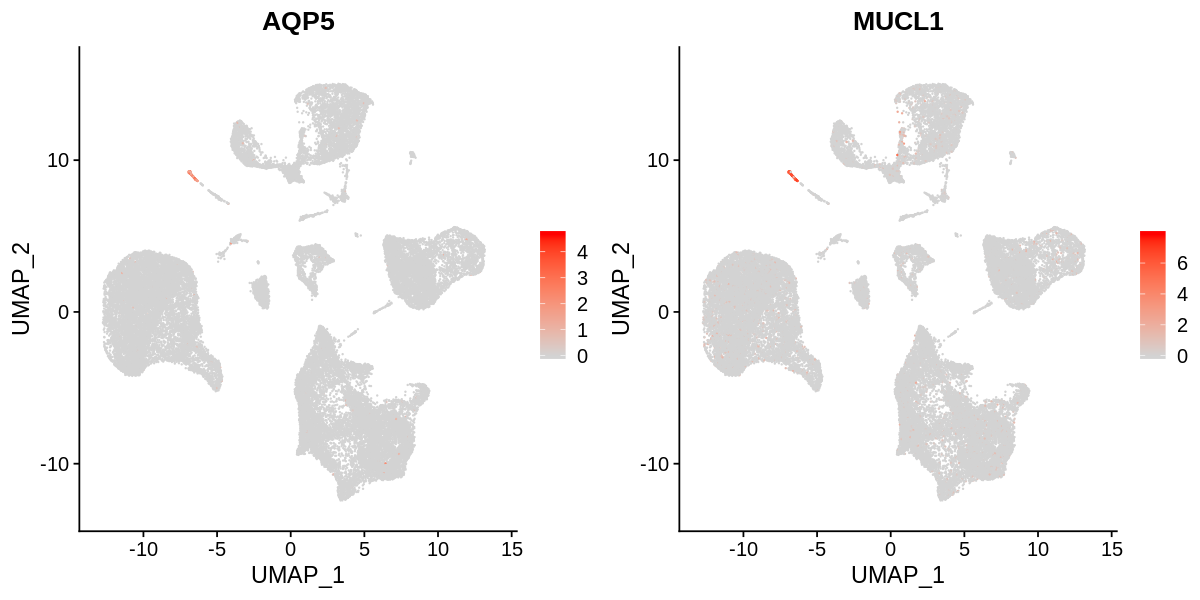

In [30]:
options(repr.plot.width=10,repr.plot.height=5)
FeaturePlot(integrate.all.NF.all.KF, features = c("AQP5","MUCL1"),cols=c("lightgrey", "red"))

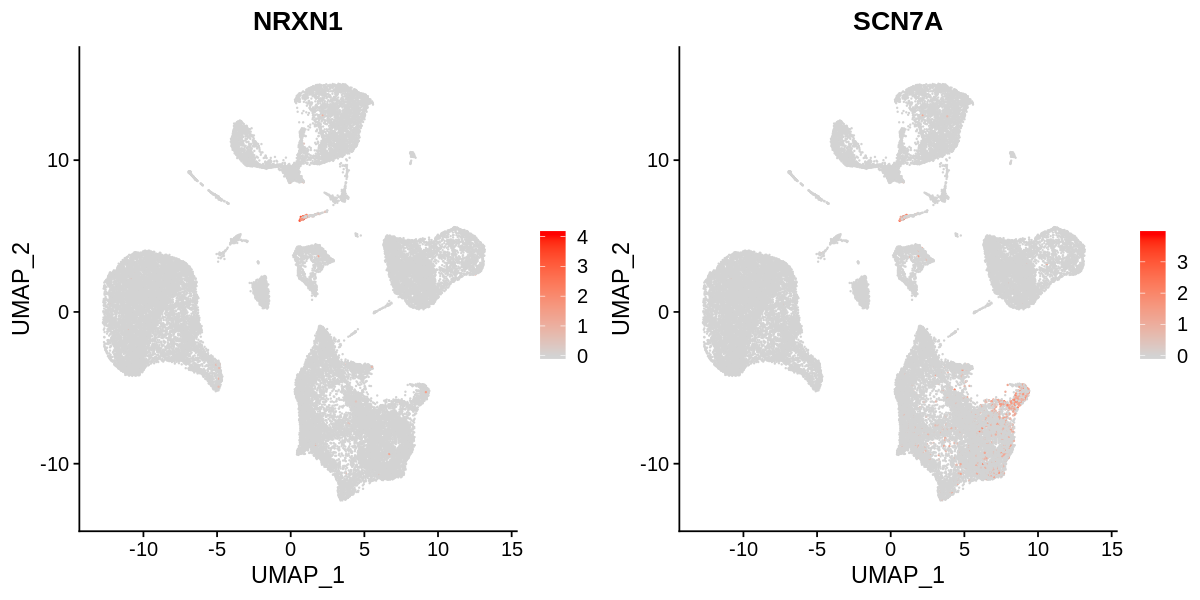

In [31]:
#neural cells
options(repr.plot.width=10,repr.plot.height=5)
FeaturePlot(integrate.all.NF.all.KF, features = c("NRXN1","SCN7A"),cols=c("lightgrey", "red"))

In [32]:
save(integrate.all.NF.all.KF,file="integrate.all.NF.all.KF.seurat.object.Rdata")

# ########################################

In [44]:
rm(list=ls())
gc()
load("integrate.all.NF.all.KF.seurat.object.Rdata")

used      (Mb)   gc trigger (Mb)   max used  (Mb)  
Ncells   2304656  123.1   4262405   227.7   4262405  227.7
Vcells 420380813 3207.3 714751836  5453.2 456457106 3482.5

In [35]:
new.cluster.id=c("Endothelial","Fibroblast","muscle_fiber","Fibroblast","Keratinocyte","Endothelial","Endothelial","Fibroblast","Keratinocyte","muscle_fiber","Immune_cell","Lymphatic_endothelial","Keratinocyte","Fibroblast","Fibroblast","Glandular","Keratinocyte","Unknown","Neural_cell","Melanocytes","Unknown")
names(new.cluster.id)=levels(integrate.all.NF.all.KF)
integrate.all.NF.all.KF=RenameIdents(integrate.all.NF.all.KF,new.cluster.id)

In [36]:
table(Idents(integrate.all.NF.all.KF))
levels(integrate.all.NF.all.KF)


          Endothelial            Fibroblast          muscle_fiber 
                12246                 13437                  5594 
         Keratinocyte           Immune_cell Lymphatic_endothelial 
                 6096                  1086                   978 
            Glandular               Unknown           Neural_cell 
                  439                   359                   242 
          Melanocytes 
                  178 

[1] "Endothelial"           "Fibroblast"            "muscle_fiber"         
 [4] "Keratinocyte"          "Immune_cell"           "Lymphatic_endothelial"
 [7] "Glandular"             "Unknown"               "Neural_cell"          
[10] "Melanocytes"

In [37]:
integrate.all.NF.all.KF$cellType=Idents(integrate.all.NF.all.KF)
Idents(integrate.all.NF.all.KF)=integrate.all.NF.all.KF$integrated_snn_res.0.3

In [38]:
selCols=c("#8dd3c7","#FFA54F","#bebada","#fb8072","#80b1d3","#2E8B57","#b3de69","#fccde5","#696969","#bc80bd")


********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************



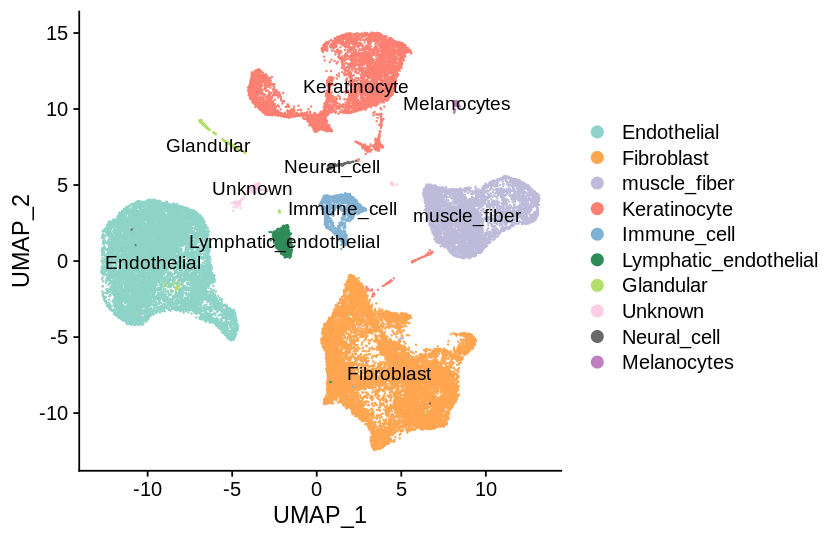

In [39]:
library(cowplot)
options(repr.plot.width=7,repr.plot.height=4.5)
DimPlot(integrate.all.NF.all.KF, reduction = "umap",label = T,label.size = 4,group.by = "cellType",cols = selCols)

In [42]:
samples.cellType.stat=as.data.frame(table(integrate.all.NF.all.KF$cellType,integrate.all.NF.all.KF$dataset))
samples.cellType.stat.prop=ddply(samples.cellType.stat,"Var2",transform,Ratio=Freq/sum(Freq))
head(samples.cellType.stat.prop)

Var1                  Var2 Freq Ratio     
1 Endothelial           KF1  3770 0.49527063
2 Fibroblast            KF1  1804 0.23699422
3 muscle_fiber          KF1   967 0.12703626
4 Keratinocyte          KF1   413 0.05425644
5 Immune_cell           KF1   180 0.02364687
6 Lymphatic_endothelial KF1   201 0.02640568

In [41]:
library(plyr)

In [43]:
library(ggplot2)
library(gplots)


Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



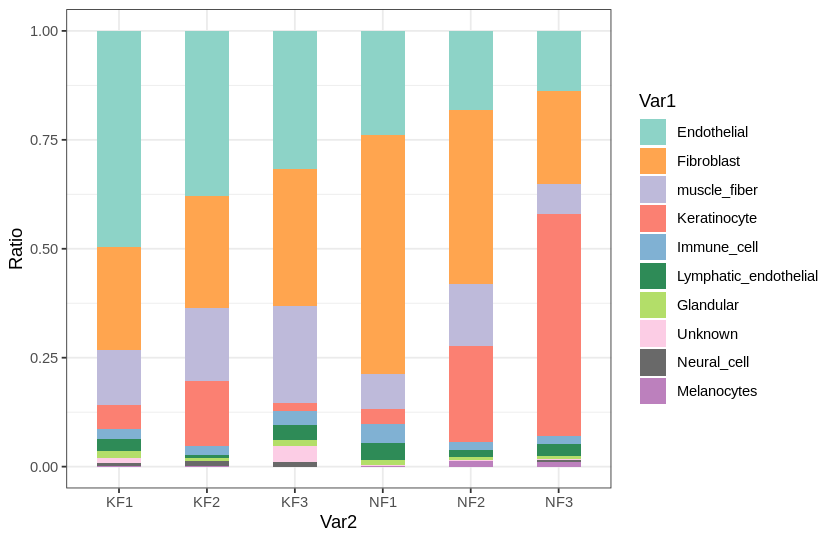

In [44]:
ggplot(samples.cellType.stat.prop,aes(x=Var2,y=Ratio,fill=Var1))+geom_bar(stat="identity",width = 0.5)+scale_fill_manual(values = selCols)+theme_bw()

In [45]:
p=ggplot(samples.cellType.stat.prop,aes(x=Var2,y=Ratio,fill=Var1))+geom_bar(stat="identity",width = 0.5)+scale_fill_manual(values = selCols)+theme_bw()
pdf("samples.prop.stat.pdf",width = 5,height = 5)
print(p)
dev.off()

png 
  2

In [ ]:
###########################################################################################################################

In [3]:
load("integrate.all.NF.all.KF.seurat.object.Rdata")

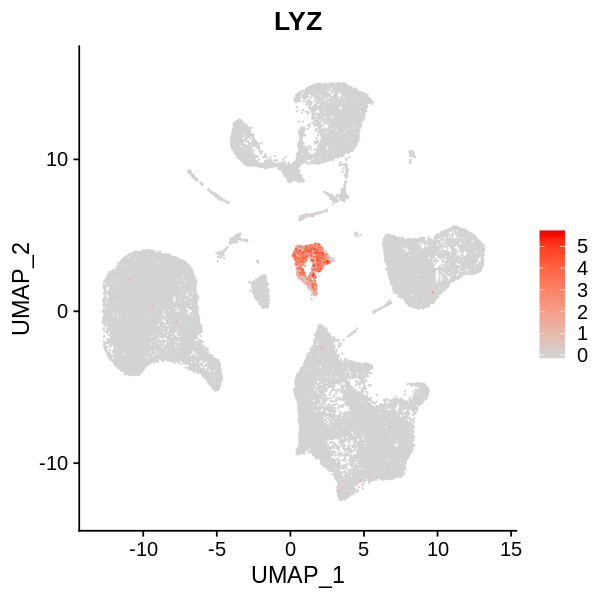

In [46]:
DefaultAssay(integrate.all.NF.all.KF)="RNA"
options(repr.plot.width=5,repr.plot.height=5)
FeaturePlot(integrate.all.NF.all.KF, features = c("LYZ"),cols=c("lightgrey", "red"))

In [33]:
DefaultAssay(integrate.all.NF.all.KF)="integrated"
integrate.all.NF.all.KF <- FindNeighbors(integrate.all.NF.all.KF, dims = 1:30)
integrate.all.NF.all.KF <- FindClusters(integrate.all.NF.all.KF, resolution = 0.3)

Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 40655
Number of edges: 1701322

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9538
Number of communities: 21
Elapsed time: 11 seconds


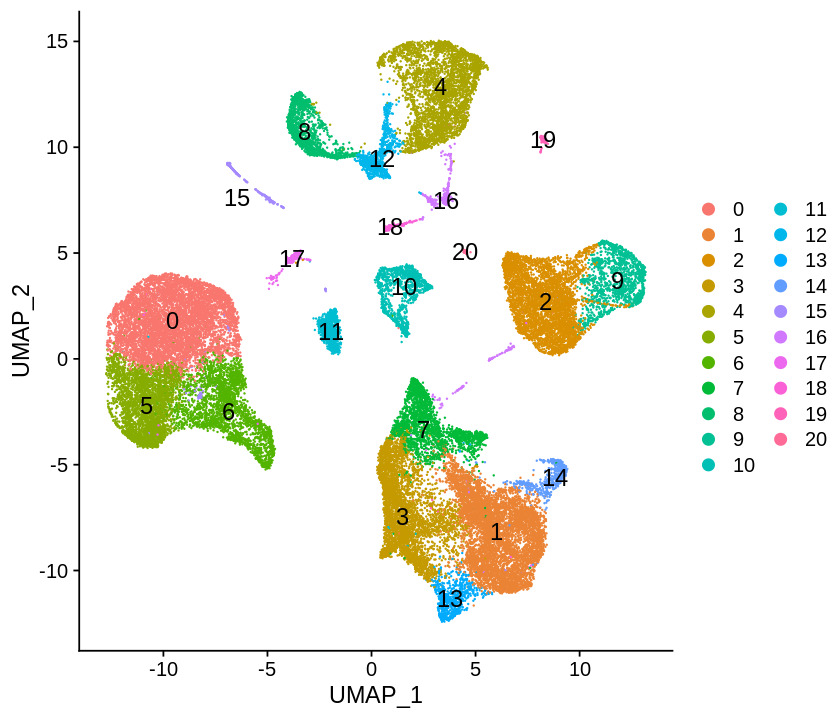

In [34]:
options(repr.plot.width=7,repr.plot.height=6)
DimPlot(integrate.all.NF.all.KF, reduction = "umap", label=T,label.size = 5)

In [47]:
selCols=(c("#DCB717","#E2272E","#5EA5C9","#76AB62","#91217F","#fdb462","#EA9014","#5A7FB9","#757C98","#178F3B","#F1A1BF","#33B9C1","#B39BC2","#851B3B","#fb8072","#80b1d3","#b3de69","#fccde5","#d9d9d9","#bc80bd","#9ebcda"))

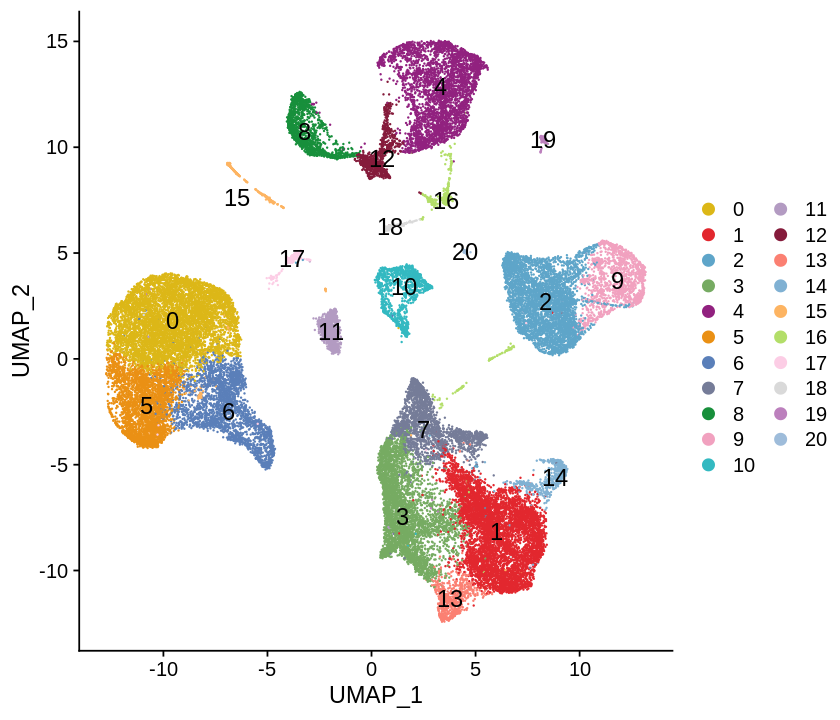

In [49]:
options(repr.plot.width=7,repr.plot.height=6)
DimPlot(integrate.all.NF.all.KF, reduction = "umap", label=T,label.size = 5,cols = selCols)

In [50]:
p=DimPlot(integrate.all.NF.all.KF, reduction = "umap", label=T,label.size = 5,cols = selCols)
pdf("integrate.all.NF.all.KF.umap.pdf",width = 7,height = 6)
print(p)
dev.off()

png 
  2

In [51]:
as.character(as.numeric(levels(integrate.all.NF.all.KF))+1)

[1] "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12" "13" "14" "15"
[16] "16" "17" "18" "19" "20" "21"

In [52]:
new.cluster.id=as.character(as.numeric(levels(integrate.all.NF.all.KF))+1)
names(new.cluster.id)=levels(integrate.all.NF.all.KF)
integrate.all.NF.all.KF=RenameIdents(integrate.all.NF.all.KF,new.cluster.id)

In [53]:
levels(integrate.all.NF.all.KF)

[1] "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12" "13" "14" "15"
[16] "16" "17" "18" "19" "20" "21"

In [54]:
p=DimPlot(integrate.all.NF.all.KF, reduction = "umap", label=T,label.size = 5,cols = selCols)
pdf("integrate.all.NF.all.KF.umap2.pdf",width = 7,height = 6)
print(p)
dev.off()

png 
  2

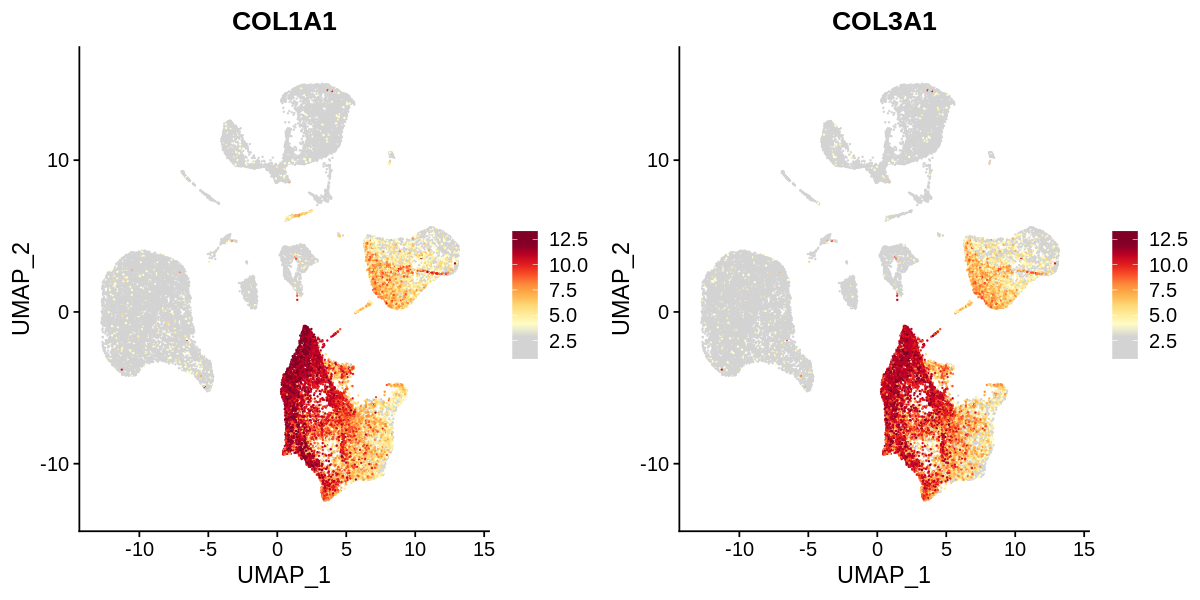

In [55]:
#fibroblast
DefaultAssay(integrate.all.NF.all.KF)="RNA"
featurePlotCols=c("lightgrey","lightgrey","lightgrey","#ffffcc","#ffeda0","#fed976","#feb24c","#fd8d3c","#fc4e2a","#e31a1c","#bd0026","#800026","#800026")
options(repr.plot.width=10,repr.plot.height=5)
FeaturePlot(integrate.all.NF.all.KF, features = c("COL1A1","COL3A1"),nc=2,cols=featurePlotCols)

In [56]:
save(integrate.all.NF.all.KF,file="integrate.all.NF.all.KF.seurat.object.Rdata")

In [ ]:
###################################################################################################################

In [3]:
load("integrate.all.NF.all.KF.seurat.object.Rdata")

In [13]:
selCols=(c("#DCB717","#E2272E","#fdb462","#5EA5C9","#76AB62","#91217F","#33B9C1","#757C98","#5A7FB9","#178F3B","#F1A1BF","#EA9014","#B39BC2","#851B3B","#fb8072","#80b1d3","#b3de69","#fccde5","#d9d9d9","#bc80bd","#9ebcda"))

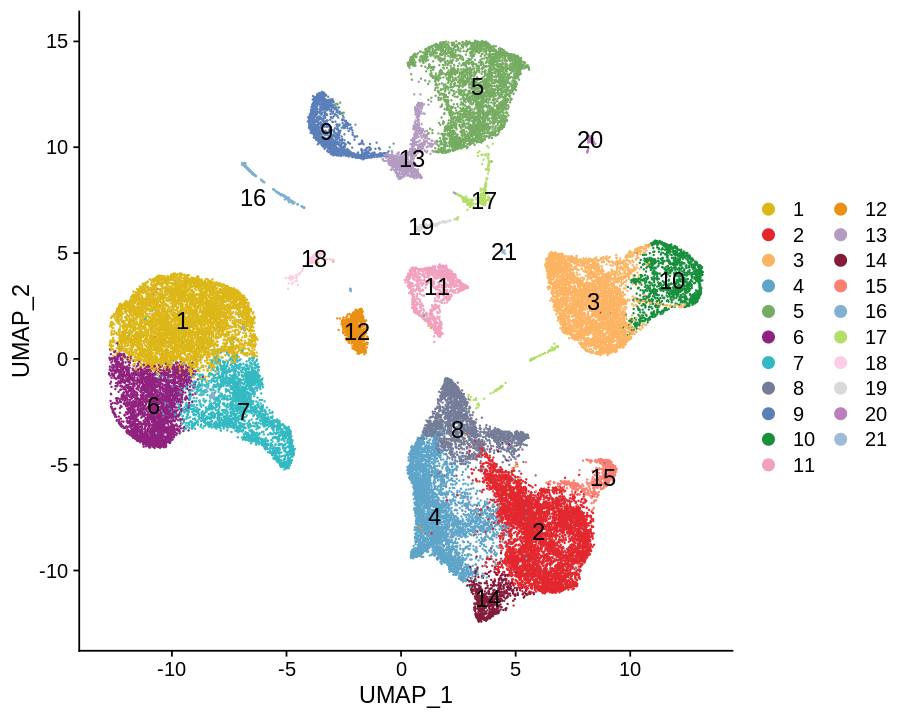

In [15]:
options(repr.plot.width=7.5,repr.plot.height=6)
DimPlot(integrate.all.NF.all.KF, reduction = "umap", label=T,label.size = 5,cols = selCols)

In [16]:
p=DimPlot(integrate.all.NF.all.KF, reduction = "umap", label=T,label.size = 5,cols = selCols)
pdf("integrate.all.NF.all.KF.umap.pdf",width = 7.5,height = 6)
print(p)
dev.off()

png 
  2

In [ ]:
#########################################################################################################################

In [3]:
load("integrate.all.NF.all.KF.seurat.object.Rdata")

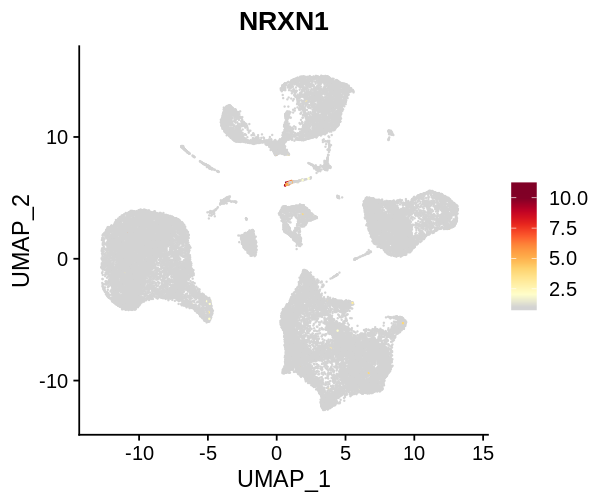

In [7]:
DefaultAssay(integrate.all.NF.all.KF)="RNA"
featurePlotCols=c("lightgrey","#ffffcc","#ffeda0","#fed976","#feb24c","#fd8d3c","#fc4e2a","#e31a1c","#bd0026","#800026","#800026")
options(repr.plot.width=5,repr.plot.height=4.2)
FeaturePlot(integrate.all.NF.all.KF, features = c("NRXN1"),nc=2,cols=featurePlotCols)

In [8]:
#options(repr.plot.width=5,repr.plot.height=4.2)
p=FeaturePlot(integrate.all.NF.all.KF, features = c("NRXN1"),nc=2,cols=featurePlotCols)
pdf("NEU_markers_NRXN1.pdf",width = 5,height = 4.2)
print(p)
dev.off()

png 
  2